In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

# Prepare Data and Import


In [40]:
#Strip the first line from the input .csv file
def getheaders(filename):
    with open(filename) as infile:
        first_line = infile.readline()

    result = [x.strip() for x in first_line.split(',')]
    return result

def getdata(filename, headers):
    data = pd.read_csv(filename, header=None, names = headers)
    data.head()
    data = data.drop(data.index[0])     #Drop header text
    data = data.astype('float64')       #Convert to float
    data.insert(0, "winner", 0) #Insert column for comparison
    return data

#numattr is the number of columns for your classification
def prepare(data, numattr):
    #Compare the percent of votes for each candidate and insert into winner column
    data.loc[data['trump'] > data['clinton'], "winner"] = 0 #Trump
    data.loc[data['clinton'] > data['trump'], "winner"] = 1 #Clinton

    #print(data)

    X = data.iloc[:,3:3+numattr].values #Get last two columns
    y = data.iloc[:,0:1].values #Get first two columns #Clinton-Trump

    X = np.insert(X, 0, 1, axis=1)

    # we build a boolean index
    where_are_zeros = (y==0)
    y[where_are_zeros] = -1

    return X,y

# Visualize 2D Data

In [41]:
def visualize(X, y, col1, col2):
    positive_indexes = np.where(y == 1)[0]  #Clinton
    negative_indexes = np.where(y == -1)[0] #Trump

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    #print(negative)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[:,1:2], positive[:,2:], s=50, c='b', marker='o', label='Clinton')
    ax.scatter(negative[:,1:2], negative[:,2:], s=50, c='r', marker='x', label='Trump')
    ax.legend()
    ax.set_xlabel('%'+col1)
    ax.set_ylabel('%'+col2)

    plt.show()

# Percent of Foreign Born People related to Percent of Population in Poverty

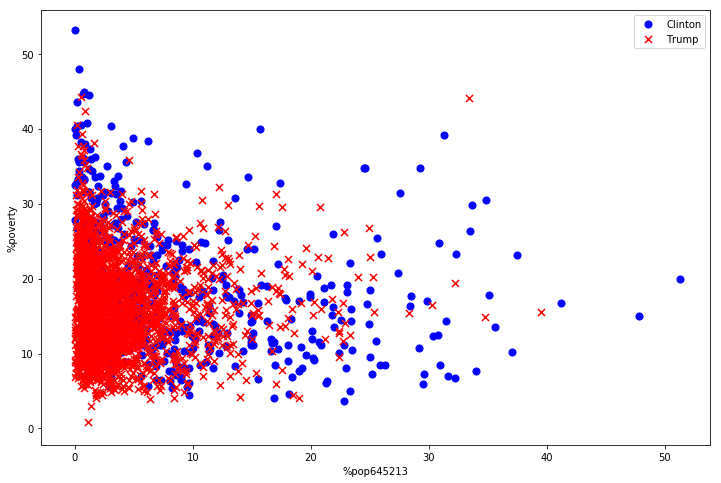

In [42]:
filename = "data.csv"

headers = getheaders(filename)

data = getdata(filename1, headers)
    
X,y = prepare(data, 2)
    
visualize(X,y,headers[2],headers[3])

# Percent of Non-English Speakers related to Percent of population with a Bachelors Degree

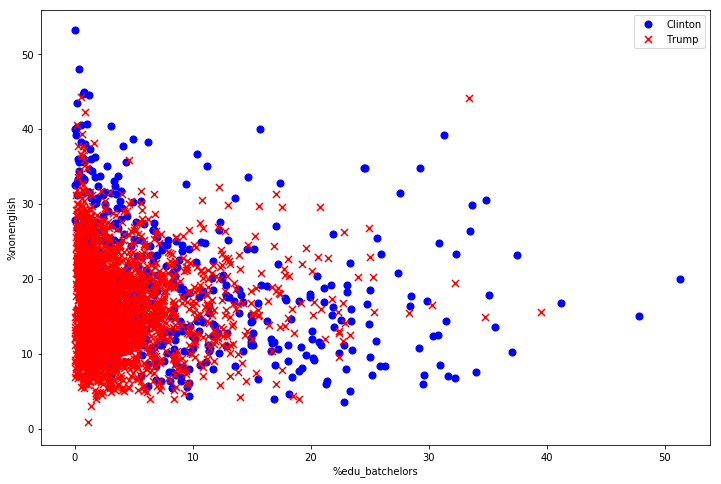

In [43]:
filename = "data1.csv"

headers = getheaders(filename)

data = getdata(filename1, headers)
    
X,y = prepare(data, 2)
    
visualize(X,y,headers[2],headers[3])